# 3.7 Exercises


## 8)

This question involves the use of simple linear regression on the `Auto` data set.

(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

In [9]:
auto = pd.read_csv('data/Auto.csv', header=0)
auto = auto[auto['horsepower'] != "?"]

auto['horsepower'] = pd.to_numeric(auto['horsepower'])

x = auto['horsepower']
y = auto['mpg']

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

results.summary()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           7.03e-81
Time:                        12:55:57   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response?
  
* The F-Statistic is much larger than 1 and the p-value is very close to 0 so we can reject the null hypothesis.   
    
ii. How strong is the relationship between the predictor and the response?

* The R-squared value is 0.606 so the there is a fairly strong relationship. ~60% of the variance in MPG can be explained by horsepower.

iii. Is the relationship between the predictor and the response positive or negative?

* There is a negative relationship between them since the horsepower coefficient is below 0.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?



In [10]:
# Predict MPG for a given horsepower value
horsepower_value = [1, 98]  # [constant, horsepower]
predicted_mpg = results.predict(horsepower_value)
print('Predicted MPG:', predicted_mpg)

# Calculate confidence and prediction intervals
prediction_results = results.get_prediction(horsepower_value)
confidence_interval = prediction_results.conf_int(alpha=0.05)
print('95% Confidence Interval:')
print(confidence_interval)

# Calculate prediction interval (95%)
n = x.shape[0]  # Number of samples
t_value = 1.96  # For 95% confidence interval
standard_error = prediction_results.se_mean
prediction_interval = [
    predicted_mpg - t_value * standard_error,
    predicted_mpg + t_value * standard_error
]
prediction_interval = [i[0] for i in prediction_interval]
print('95% Prediction Interval:')
print(prediction_interval)



Predicted MPG: [24.46707715]
95% Confidence Interval:
[[23.97307896 24.96107534]]
95% Prediction Interval:
[23.9746029500891, 24.959551354935762]


b)  Plot the response and the predictor. Display the least squares regression line.

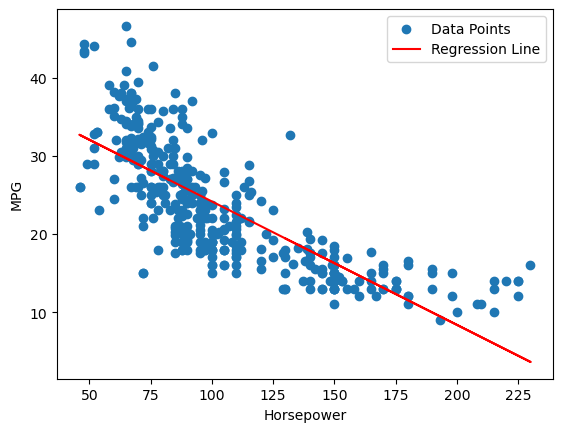

In [11]:
# Scatter plot of data points
plt.scatter(x['horsepower'], y, label='Data Points')

# Plot the regression line
plt.plot(x['horsepower'], results.fittedvalues, 'r', label='Regression Line')

# Labeling axes and adding legend
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

# Show the plot
plt.show()

c)  Produce diagnostic plots of the least squares regression fit.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


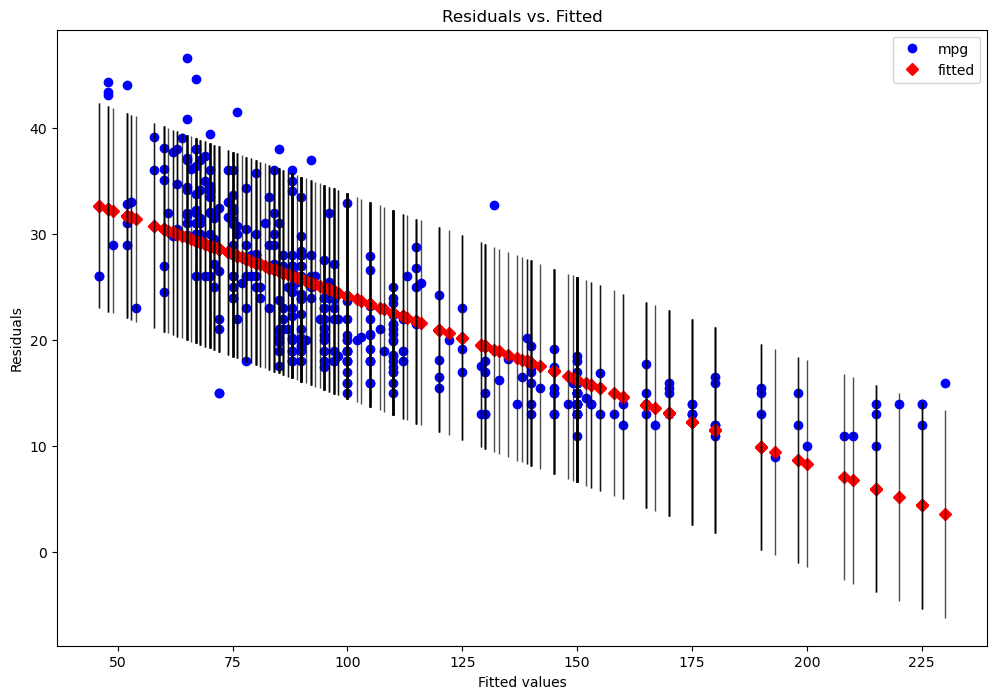

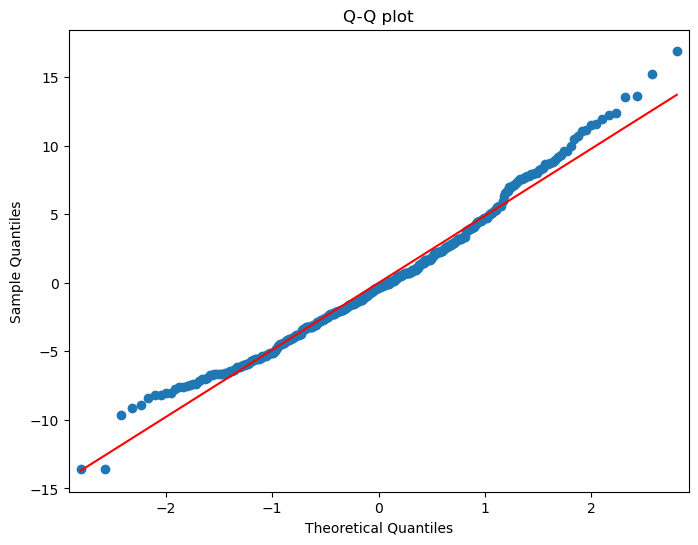

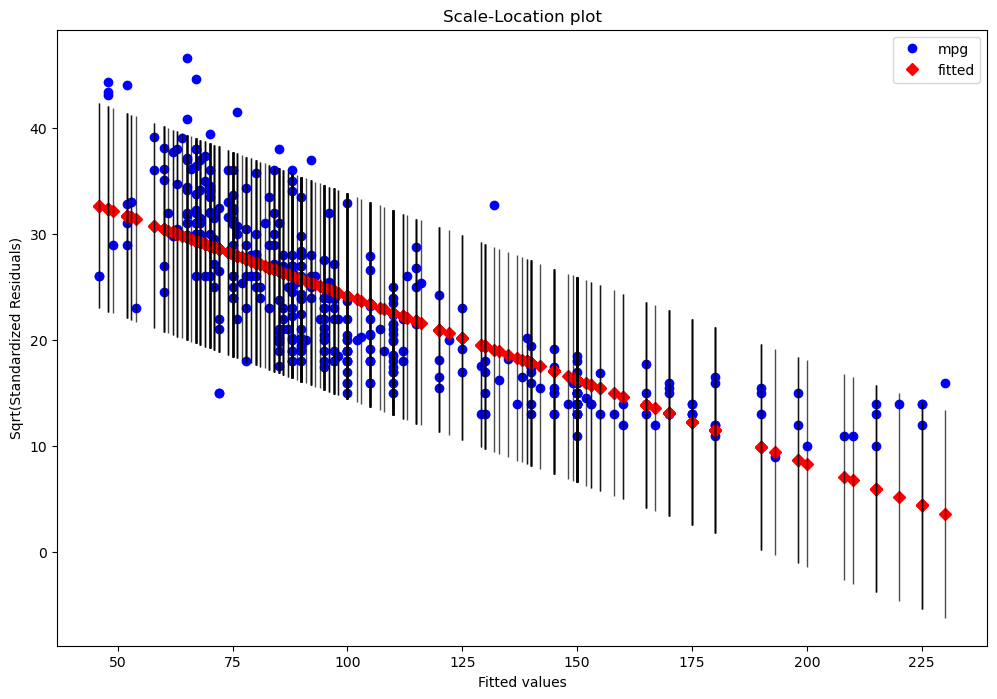

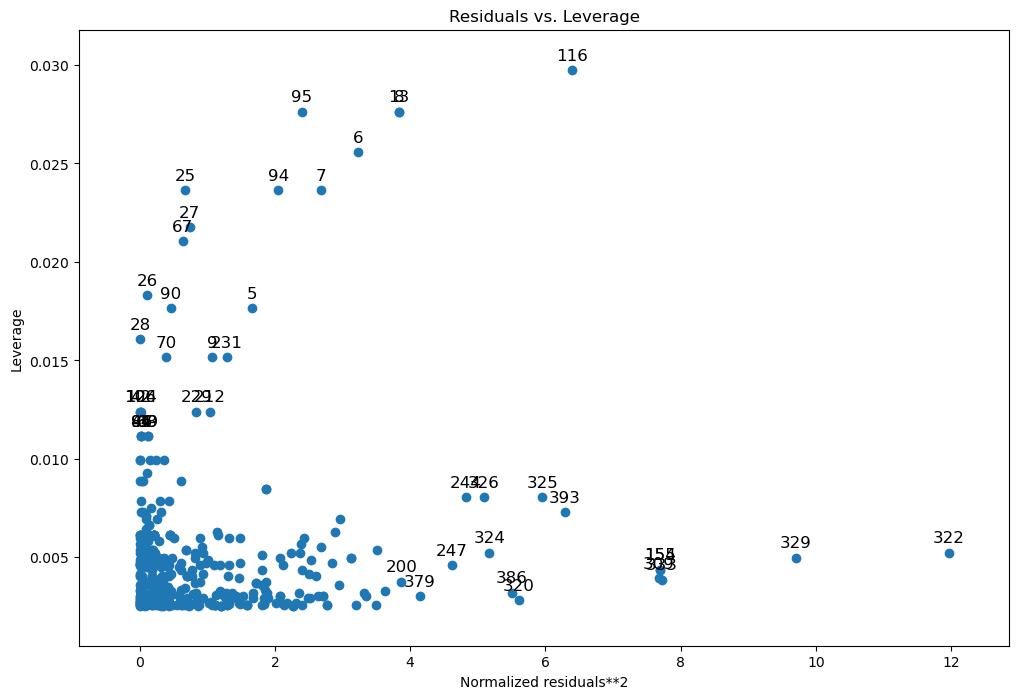

In [12]:
import statsmodels.graphics.regressionplots as smg

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

# Create diagnostic plots
fig, ax = plt.subplots(figsize=(12, 8))

# Residuals vs. Fitted plot
smg.plot_fit(results, 1, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted')

# Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(results.resid, line='s', ax=ax)
ax.set_title('Q-Q plot')

# Scale-Location plot
fig, ax = plt.subplots(figsize=(12, 8))
smg.plot_fit(results, 1, ax=ax)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Sqrt(Standardized Residuals)')
ax.set_title('Scale-Location plot')

# Residuals vs. Leverage plot
fig, ax = plt.subplots(figsize=(12, 8))
smg.plot_leverage_resid2(results, ax=ax)
ax.set_title('Residuals vs. Leverage')

# Show the plots
plt.show()

There seem to be slight tails in the normal distribution. Which causes some skew. 

# 9)

This question involves the use of multiple linear regression on the Auto data set.

a) Produce a scatterplot matrix which includes all of the variables in the data set.

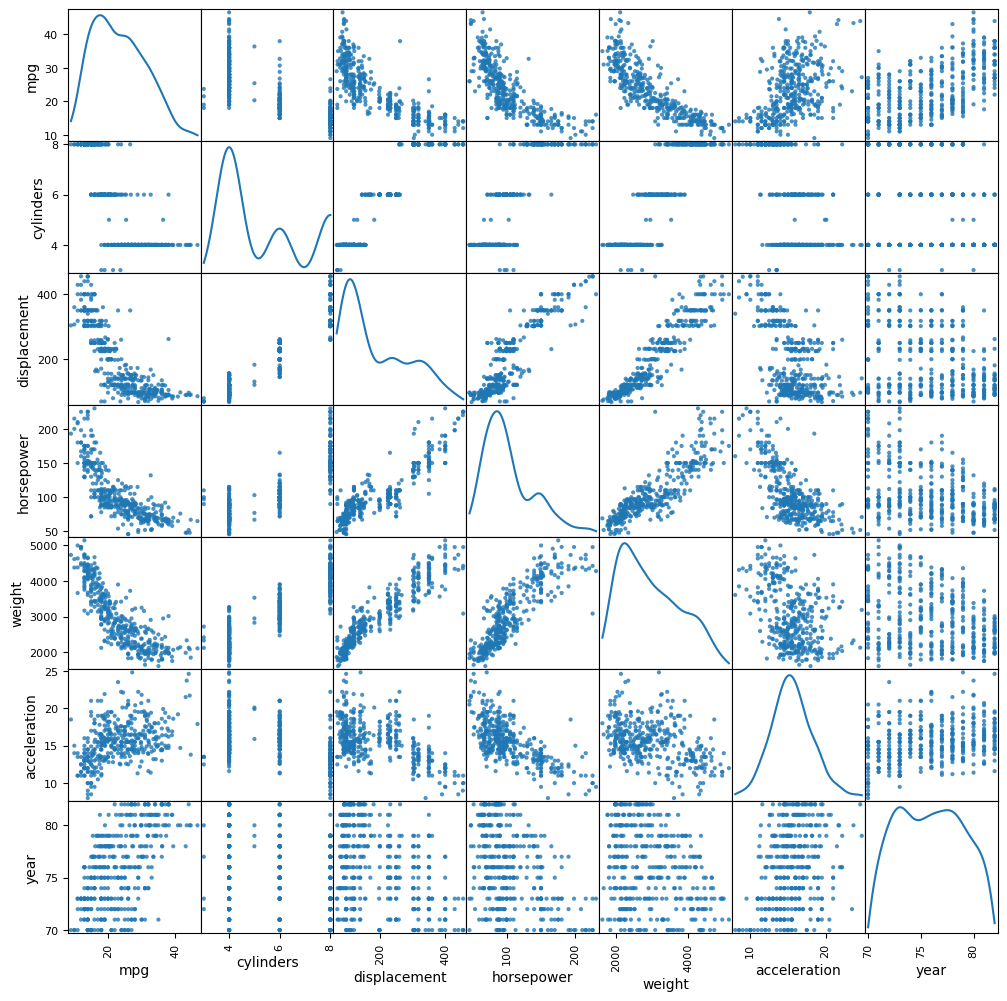

In [13]:
from pandas.plotting import scatter_matrix

# Select the desired variables for the scatterplot matrix
selected_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Create a DataFrame with only the selected columns
selected_data = auto[selected_columns]

# Generate the scatterplot matrix
scatter_matrix(selected_data, alpha=0.8, figsize=(12, 12), diagonal='kde')

# Show the plot
plt.show()

b) Displaying the correlation matrix. 

In [14]:
correlation_matrix = selected_data.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration      year  
mpg               0.423329  0.580541  
cylinders        -0.504683 -0.345647  
displacement     -0.543800 -0.369855  
horsepower       -0.689196 -0.416361  
weight           -0.416839 -0.309120  
acceleration      1.000000  0.290316  
year              0.290316  1.000000  


c) Perform multiple linear regression.

i) Is there a relationship between the predictors and the re- sponse?

*R-squared and Adjusted R-squared: These values provide a measure of how well the model fits the data. An R-squared value of 0.821 indicates that around 82.1% of the variability in the dependent variable ("mpg") is explained by the independent variables in the model. The adjusted R-squared accounts for the number of variables in the model and is slightly lower at 0.818.*

*F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the model. In this case, the F-statistic is 252.4, and the associated p-value (Prob (F-statistic)) is very close to zero (2.04e-139), suggesting that the model as a whole is statistically significant.*

ii) Which predictors appear to have a statistically significant relationship to the response?

*The low p-value(P>|t|) of "weight," "year," and "origin" indicate that they are statistically significant predictors of "mpg".* 

iii) What does the coefficient for the year variable suggest?

*The coefficient for "year" is 0.7508. This indicates that, holding other variables constant, a one-year increase in the model year of the vehicle is associated with an increase of 0.7508 units in mpg. Since the coefficient is positive, it seems that over the years cars have become more fuel efficient.*

In [16]:
# Prepare the predictor and response variables
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']

# Add a constant column to the predictor variables for the intercept term
X = sm.add_constant(X)

# Perform the multiple linear regression
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
results.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          2.04e-139
Time:                        12:56:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

* There appear to be some outliers for the 5 and 6 cylinder enginers. We can see in the individual plots that they are outside the fittered values. For 5 cylinder enginers it might be about low amount of data. 

* In the leverage plot(below) with cook's line added we can see that there are values far from center and above/below the line. This indicates high leverage points.

eval_env: 1
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
eval_env: 1
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Inte

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


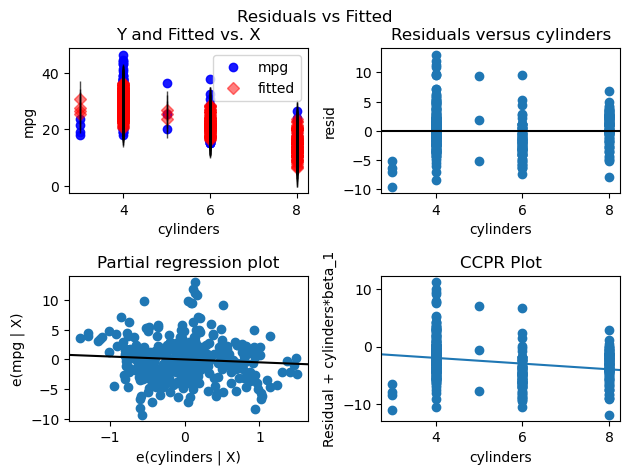

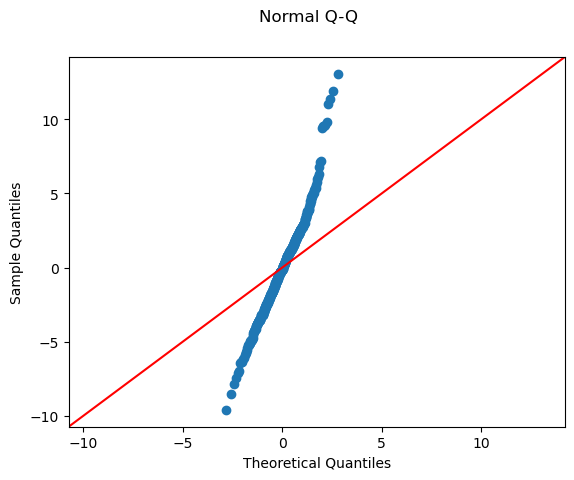

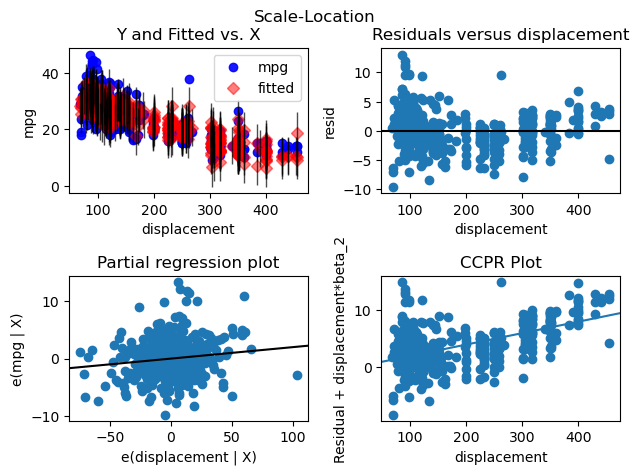

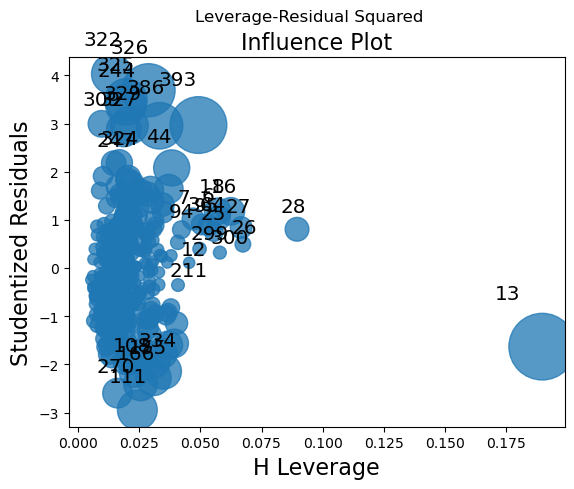

In [20]:
# Generate the residual plots
fig = sm.graphics.plot_regress_exog(results, 1);
fig.suptitle('Residuals vs Fitted');

fig = sm.graphics.qqplot(results.resid, line='45');
fig.suptitle('Normal Q-Q');

fig = sm.graphics.plot_regress_exog(results, 2);
fig.suptitle('Scale-Location');

fig = sm.graphics.influence_plot(results);
fig.suptitle('Leverage-Residual Squared');

plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


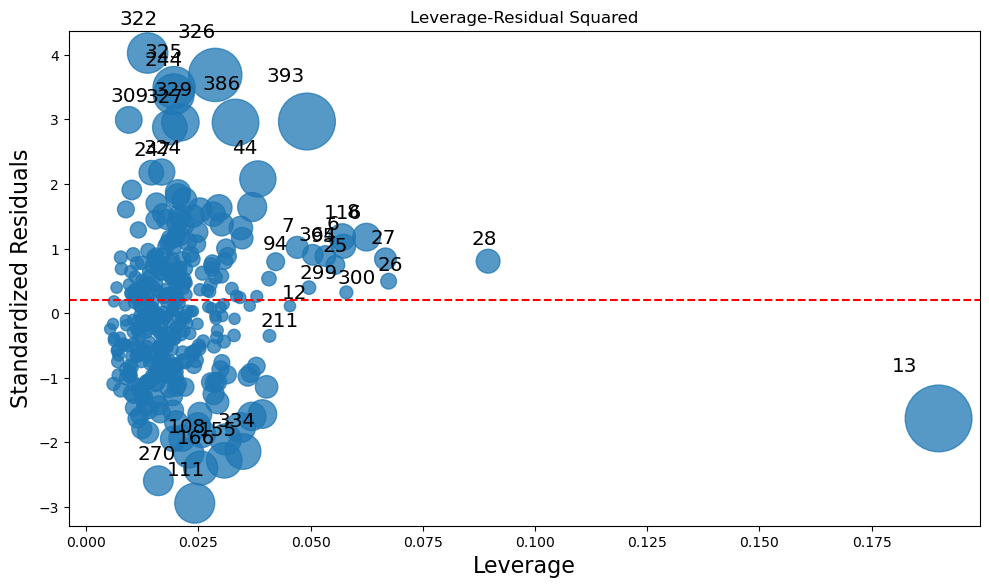

In [21]:
# Generate the Leverage-Residual Squared plot with custom formatting
fig, ax = plt.subplots(figsize=(10, 6))

sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

# Customize the appearance of the plot
ax.set_title('Leverage-Residual Squared')
ax.set_xlabel('Leverage')
ax.set_ylabel('Standardized Residuals')

# Add a dashed line to indicate Cook's distance threshold
ax.axhline(y=4 / len(X)**0.5, color='r', linestyle='dashed')

plt.tight_layout()
plt.show()

e) Fit the linear regression models with interaction effects. Do any interactions appear to be statistically significant?

```
displacement_weight: p-value < 0.001 (Highly statistically significant)
displacement_origin: p-value = 0.039 (Statistically significant)
horsepower_year: p-value < 0.001 (Highly statistically significant)
horsepower_origin: p-value = 0.005 (Statistically significant)
```

In [28]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']

# Select variables for interaction terms
interaction_vars = ['displacement', 'horsepower', 'weight', 'year', 'origin']

# Generate interaction terms for selected variables
for i, var1 in enumerate(interaction_vars):
    for var2 in interaction_vars[i + 1:]:
        interaction_name = f'{var1}_{var2}'
        X[interaction_name] = X[var1] * X[var2]

# Add a constant column to the predictor variables for the intercept term
X = sm.add_constant(X)

# Perform the multiple linear regression with interaction terms
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          6.31e-161
Time:                        13:22:03   Log-Likelihood:                -944.27
No. Observations:                 392   AIC:                             1925.
Df Residuals:                     374   BIC:                             1996.
Df Model:                          17                                         
Covariance Type:            nonrobust  

/var/folders/y3/v1dkg56x7595yq_9tx87ystm0000gn/T/ipykernel_56242/4100100720.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[interaction_name] = X[var1] * X[var2]


f) Try a few different transformations of the variables, such as log(X), √X, X2

Statistically Significant:

```
sqrt_horsepower: The coefficient for the square root transformed 'horsepower' variable is statistically significant (p-value < 0.001).
weight_squared: The coefficient for the squared 'weight' variable is statistically significant (p-value = 0.003).
year_squared: The coefficient for the squared 'year' variable is statistically significant (p-value < 0.001).
```

Statistically Insignificant:

```
log_displacement: The coefficient for the log-transformed 'displacement' variable is not statistically significant (p-value = 0.210).
```

In [30]:
# Prepare the predictor and response variables
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']

# Apply transformations
X['log_displacement'] = X['displacement'].apply(lambda x: np.log(x))
X['sqrt_horsepower'] = X['horsepower'].apply(lambda x: x ** 0.5)
X['weight_squared'] = X['weight'].apply(lambda x: x ** 2)
X['year_squared'] = X['year'].apply(lambda x: x ** 2)

# Add a constant column to the predictor variables for the intercept term
X = sm.add_constant(X)

# Perform the multiple linear regression with transformed variables
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.62e-165
Time:                        18:03:33   Log-Likelihood:                -951.11
No. Observations:                 392   AIC:                             1926.
Df Residuals:                     380   BIC:                             1974.
Df Model:                          11                                         
Covariance Type:            nonrobust  

/var/folders/y3/v1dkg56x7595yq_9tx87ystm0000gn/T/ipykernel_56242/1023481129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_displacement'] = X['displacement'].apply(lambda x: np.log(x))


# 10)

This question should be answered using the Carseats data set.

a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

b) Provide an interpretation of each coefficient in the model.

* The coefficient for the intercept is 13.0435, which represents the expected value of 'Sales' when all other predictor variables are zero. This intercept is statistically significant (p-value < 0.001).
* Price': The coefficient for 'Price' is -0.0545, which suggests that a one-unit increase in 'Price' is associated with a decrease of 0.0545 units in 'Sales.' This effect is statistically significant (p-value < 0.001).
* US': The coefficient for 'US' is 1.2006, indicating that being in the US is associated with an increase of 1.2006 units in 'Sales.' This effect is statistically significant (p-value < 0.001).
* Urban': The coefficient for 'Urban' is -0.0219, but it is not statistically significant (p-value = 0.936). This suggests that the variable 'Urban' may not have a significant impact on 'Sales' in this model.

In [42]:
carseats = pd.read_csv('data/Carseats.csv', header=0)

# Encode categorical variables 'Urban' and 'US'
carseats['Urban'] = carseats['Urban'].apply(lambda x: 1 if x == "Yes" else 0)
carseats['US'] = carseats['US'].apply(lambda x: 1 if x == "Yes" else 0)

# Prepare the predictor and response variables
X = carseats[['Price', 'Urban', 'US']]
y = carseats['Sales']

# Add a constant column to the predictor variables for the intercept term
X = sm.add_constant(X)

# Perform the multiple linear regression with interaction terms
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        18:23:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust  

c) Write out the model in equation form, being careful to handle the qualitative variables properly.

Sales = β0 + (β1 × Price) + (β2 × Urban) + (β3 × US) + ϵ

d) For which coefficients can you reject the null hypothesis?

* As mentioned before only Urban(high p-value) is not statistically significant. The other variables you can reject the null hypothesis. 

e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

* In this case we just remove "Urban".

In [43]:
# Prepare the predictor and response variables
X = carseats[['Price', 'US']]
y = carseats['Sales']

# Add a constant column to the predictor variables for the intercept term
X = sm.add_constant(X)

# Perform the multiple linear regression with interaction terms
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        18:23:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust  

f) How well do the models in (a) and (e) fit the data?

* F-statistic: The F-statistic has increased in the modified model (62.43 compared to 41.52 in the original model). This indicates that the model without 'Urban' is better at explaining the variance in 'Sales' compared to the original model.

g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [44]:
# Get the coefficient values
coefficients = results.params

# Get the standard errors of the coefficients
std_errors = results.bse

# Degrees of freedom (number of observations - number of predictors)
df = len(y) - len(coefficients)

# Desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the t-value for the desired confidence level and degrees of freedom
from scipy.stats import t
t_value = t.ppf(1 - (1 - confidence_level) / 2, df)

# Calculate the confidence intervals
confidence_intervals = []
for coef, std_err in zip(coefficients, std_errors):
    margin_of_error = t_value * std_err
    lower_bound = coef - margin_of_error
    upper_bound = coef + margin_of_error
    confidence_intervals.append((lower_bound, upper_bound))

# Print the confidence intervals
for coef_name, (lower, upper) in zip(coefficients.index, confidence_intervals):
    print(f"95% Confidence Interval for {coef_name}: [{lower:.3f}, {upper:.3f}]")


95% Confidence Interval for const: [11.790, 14.271]
95% Confidence Interval for Price: [-0.065, -0.044]
95% Confidence Interval for US: [0.692, 1.708]


h) Any evidence of outliers?

* In the plot we can see evidence of values with high cooks distance. So yes there are outliers. 

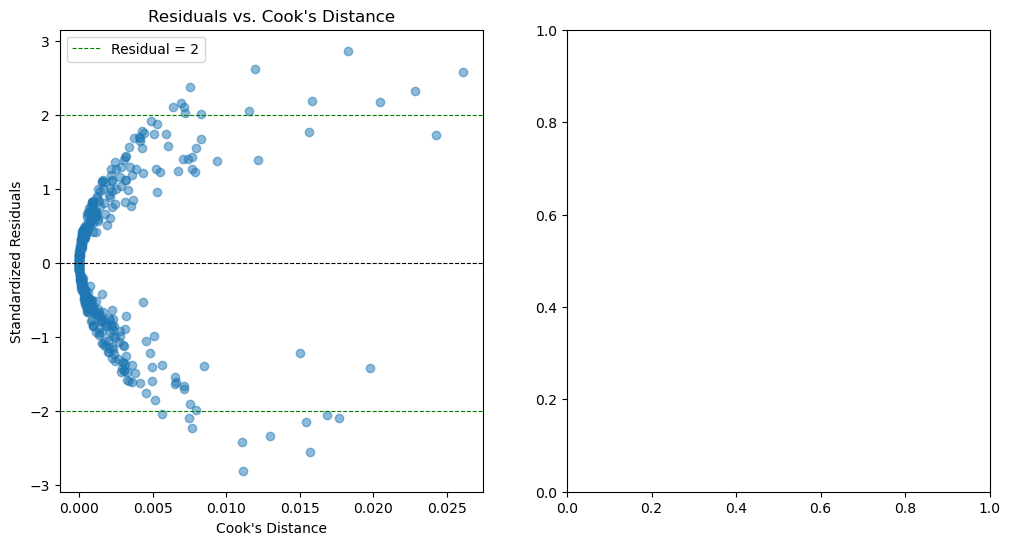

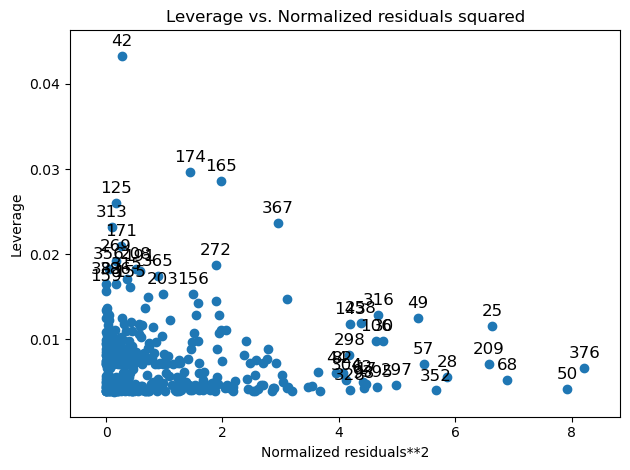

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# Calculate standardized residuals
std_residuals = results.get_influence().resid_studentized_internal

# Calculate Cook's distance
cooks_distance = results.get_influence().cooks_distance[0]

# Create a scatter plot of residuals vs. Cook's distance
plt.figure(figsize=(12, 6))

# Plot standardized residuals vs. Cook's distance
plt.subplot(1, 2, 1)
plt.scatter(cooks_distance, std_residuals, alpha=0.5)
plt.title("Residuals vs. Cook's Distance")
plt.xlabel("Cook's Distance")
plt.ylabel("Standardized Residuals")

# Plot Cook's distance cutoff line
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axhline(y=2, color='green', linewidth=0.8, linestyle='--', label='Residual = 2')
plt.axhline(y=-2, color='green', linewidth=0.8, linestyle='--')
plt.legend()

# Create a leverage-residual squared plot
plt.subplot(1, 2, 2)
plot_leverage_resid2(results)

plt.tight_layout()
plt.show()


# 11) 

In this problem we will investigate the t-statistic for the null hypoth- esis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

```
> set.seed(1)
> x <- rnorm(100)
> y <- 2 * x + rnorm(100)
```

* This is in r but we need to translate to python. 

In [57]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0).)

* Low p-value so we can reject the null hypothesis. 

In [56]:
import scipy.stats as stats

# Perform simple linear regression without intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Report the results
print("Coefficient Estimate (βˆ):", slope)
print("Standard Error:", std_err)
print("T-Statistic:", slope / std_err)
print("P-Value:", p_value)

Coefficient Estimate (βˆ):Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 2.0954271336511723
Standard Error: 0.10592281545707151
T-Statistic: 19.782585315629273
P-Value: 5.3870778800642255e-36


b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

* There is a lower standard error and coefficent estimate with these results compared to a. 

In [55]:
slope, _, r_value, p_value, std_err = stats.linregress(y, x)

# Report the results
print("Coefficient Estimate (βˆ):", slope)
print("Standard Error:", std_err)
print("T-Statistic:", slope / std_err)
print("P-Value:", p_value)

Coefficient Estimate (βˆ):Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 0.3816570892125358
Standard Error: 0.019292578958878905
T-Statistic: 19.78258531562926
P-Value: 5.387077880064534e-36


c) What is the relationship between the results obtained in (a) and (b)?

* The small p-values in both cases suggest that the relationships are likely not due to random chance. The t-statistic indicates how many standard errors the coefficient estimate is away from zero. Since the t-statistic is much larger than 2 (which corresponds roughly to a 95% confidence level), it suggests a strong evidence against the null hypothesis (H0: β = 0).

d/e) 

If the intercept is forced to be zero in both regressions (y onto x and x onto y), then the t-statistic for the regression of y onto x will indeed be the same as the t-statistic for the regression of x onto y. This is because when the intercept is set to zero, the coefficients represent the slope of the linear relationship between the variables.

In this scenario, the t-statistic for each regression will be the ratio of the coefficient estimate to its standard error, and since the same coefficient estimate is used in both regressions (due to the symmetry of the situation), the t-statistics will be identical.

So, if the intercept is forced to be zero in both regressions, it is expected that the t-statistic for the regression of y onto x will be the same as the t-statistic for the regression of x onto y. This symmetry holds true when intercepts are constrained to be zero in simple linear regression.

f) Show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.

In [59]:
# Regression of y onto x with an intercept
X_y_on_x = sm.add_constant(x)
model_y_on_x = sm.OLS(y, X_y_on_x)
results_y_on_x = model_y_on_x.fit()
t_statistic_y_on_x = results_y_on_x.tvalues[1]  # t-statistic for beta1

# Regression of x onto y with an intercept
X_x_on_y = sm.add_constant(y)
model_x_on_y = sm.OLS(x, X_x_on_y)
results_x_on_y = model_x_on_y.fit()
t_statistic_x_on_y = results_x_on_y.tvalues[1]  # t-statistic for beta1

print("T-statistic for H0: beta1 = 0 in regression of y onto x:", t_statistic_y_on_x)
print("T-statistic for H0: beta1 = 0 in regression of x onto y:", t_statistic_x_on_y)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
T-statistic for H0: beta1 = 0 in regression of y onto x: 19.78258531562926
T-statistic for H0: beta1 = 0 in regression of x onto y: 19.78258531562925
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 12)

This problem involves simple linear regression without an intercept.

a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

* The coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X when the two variables have a correlation coefficient of 1 or -1.

b/c) Generate an example in (python) with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X. And generate an example in (python) with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [66]:
# Different
np.random.seed(1)
n = 100
x = np.random.randn(n)
y = 2 * x + np.random.randn(n)

# Regression of X onto Y
reg_x_on_y = sm.OLS(x, sm.add_constant(y)).fit()
print(reg_x_on_y.summary())

# Regression of Y onto X
reg_y_on_x = sm.OLS(y, sm.add_constant(x)).fit()
print(reg_y_on_x.summary())

# Same
np.random.seed(2)
n = 100
x = np.random.randn(n)
y = x

# Regression of X onto Y
reg_x_on_y = sm.OLS(x, sm.add_constant(y)).fit()
print("Regression of X onto Y:")
print(reg_x_on_y.summary())

# Regression of Y onto X
reg_y_on_x = sm.OLS(y, sm.add_constant(x)).fit()
print("\nRegression of Y onto X:")
print(reg_y_on_x.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           5.39e-36
Time:                        18:56:57   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust  

# 13)

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X. Translate to python.

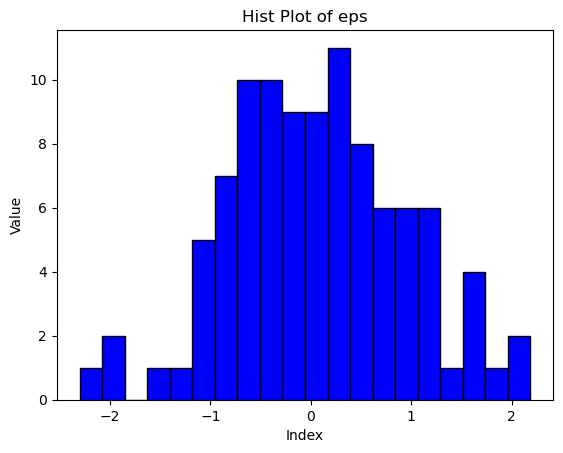

In [90]:
np.random.seed(1)
x = np.random.randn(100)

plt.hist(x, bins=20, color='blue', edgecolor='black')
plt.title("Hist Plot of eps")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25. (in python)

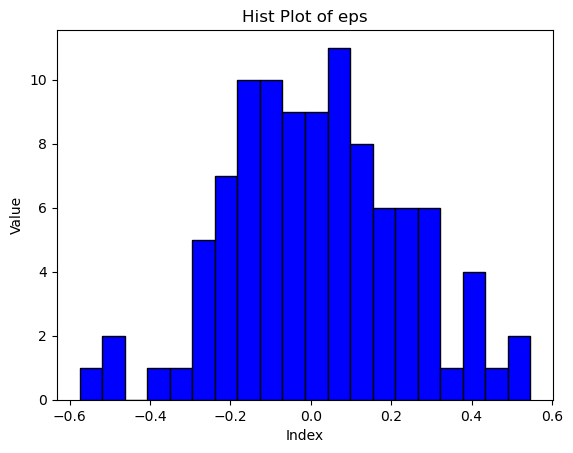

In [91]:
np.random.seed(1)
eps = np.random.normal(0, 0.25, 100)

# Create a scatter plot
plt.hist(eps, bins=20, color='blue', edgecolor='black')
plt.title("Hist Plot of eps")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


c) Using x and eps, generate a vector y according to the model
Y =−1+0.5X+ε. (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?

* β0 (intercept) is -1.
* β1 (slope) is 0.5.
* The length is 100, the same as the other vectors we are using. 

In [97]:
# Generate x values
x = np.random.normal(0, 1, 100)

# Generate less noisy eps values with smaller variance
eps = np.random.normal(0, 0.25, 100)

# Generate y values with less noise
y = -1 + 0.5 * x + eps

# Print the length of y, and the values of β0 and β1
print("Length of y:", len(y))
print("β0 (Intercept):", -1)
print("β1 (Slope):", 0.5)

Length of y: 100
β0 (Intercept): -1
β1 (Slope): 0.5


d) Create a scatter plot between x and y.

* The relationship is linear.

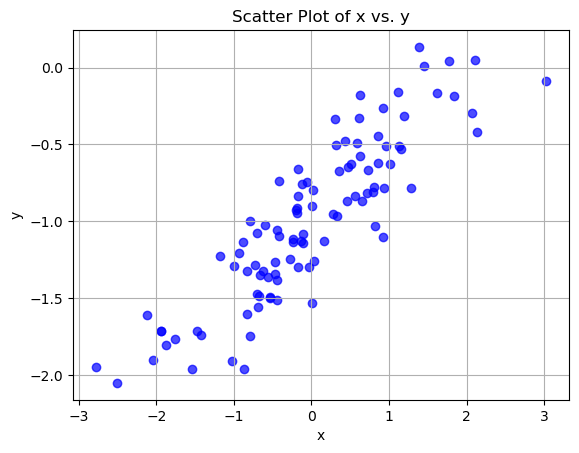

In [98]:
plt.scatter(x, y, marker='o', color='blue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs. y')
plt.grid(True)
plt.show()

e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

* In the results you provided, you can see that the estimated coefficients βˆ0 and βˆ1 are both very close to the true values β0 and β1, which are -1 and 1, respectively. The model is quite simple so this is expected. 

In [99]:
# Add a constant column to x for the intercept
X = sm.add_constant(x)

# Fit a least squares linear model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     337.1
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.73e-33
Time:                        19:26:57   Log-Likelihood:                -2.9783
No. Observations:                 100   AIC:                             9.957
Df Residuals:                      98   BIC:                             15.17
Df Model:                           1                                         
Covariance Type:            nonrobust  

f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate leg- end.

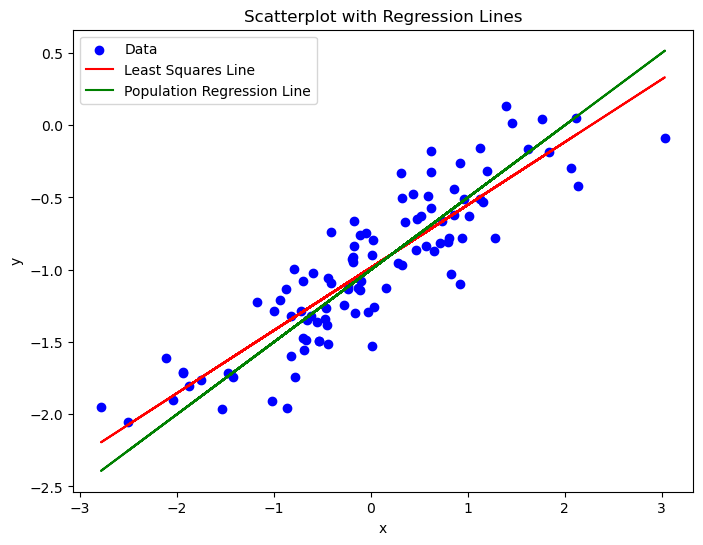

In [100]:
# Fit least squares line
beta_hat = np.polyfit(x, y, 1)
y_hat = np.polyval(beta_hat, x)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_hat, label='Least Squares Line', color='red')
plt.plot(x, -1 + 0.5 * x, label='Population Regression Line', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Regression Lines')
plt.legend()
plt.show()

g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

* Results suggest that adding the quadratic term does not substantially improve the model fit for the given data, as the quadratic term's coefficient is not statistically significant and its value is extremely close to zero.

In [101]:
# Create a DataFrame
data = pd.DataFrame({'x': x, 'x_squared': x ** 2, 'y': y})

# Fit the polynomial regression model
X = data[['x', 'x_squared']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           3.88e-32
Time:                        19:27:03   Log-Likelihood:                -2.9446
No. Observations:                 100   AIC:                             11.89
Df Residuals:                      97   BIC:                             19.70
Df Model:                           2                                         
Covariance Type:            nonrobust  

h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

* The polynomial model shows that x^2 is even less statistically significant. 

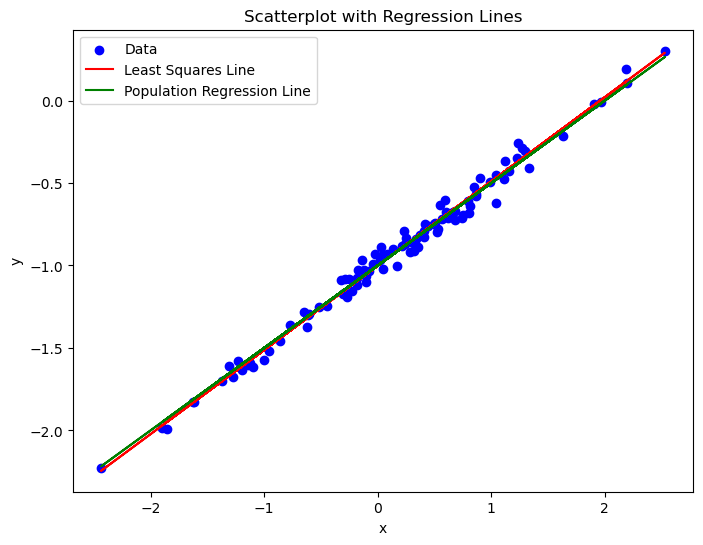

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4528.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.67e-96
Time:                        19:16:28   Log-Likelihood:                 159.18
No. Observations:                 100   AIC:                            -312.4
Df Residuals:                      97   BIC:                            -304.5
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [86]:
# Generate x values
x = np.random.normal(0, 1, 100)

# Generate less noisy eps values with smaller variance
eps = np.random.normal(0, 0.05, 100)

# Generate y values with less noise
y = -1 + 0.5 * x + eps

# Fit least squares line
beta_hat = np.polyfit(x, y, 1)
y_hat = np.polyval(beta_hat, x)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_hat, label='Least Squares Line', color='red')
plt.plot(x, -1 + 0.5 * x, label='Population Regression Line', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Regression Lines')
plt.legend()
plt.show()

# Create a DataFrame
data = pd.DataFrame({'x': x, 'x_squared': x ** 2, 'y': y})

# Fit the polynomial regression model
X = data[['x', 'x_squared']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

The R-squared value is 0.383, indicating that approximately 38.3% of the variability in the response variable y can be explained by the linear regression model with both the linear and quadratic terms. This value is lower than previous results with lower noise. 

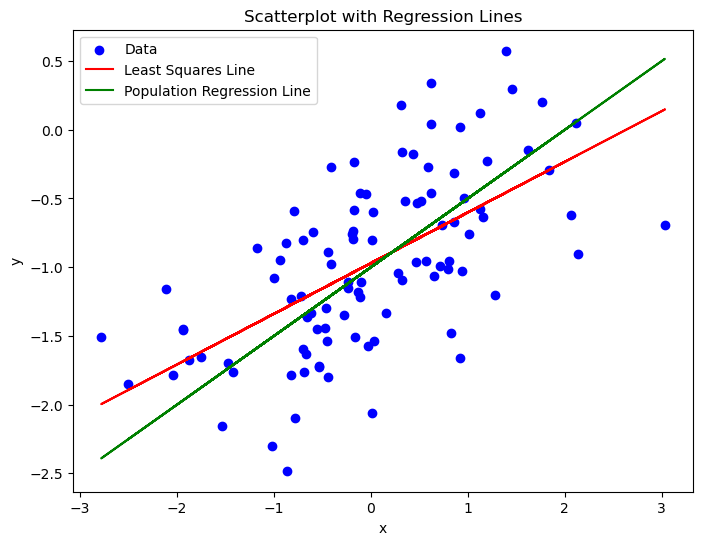

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     30.11
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           6.73e-11
Time:                        19:18:35   Log-Likelihood:                -72.259
No. Observations:                 100   AIC:                             150.5
Df Residuals:                      97   BIC:                             158.3
Df Model:                           2                                         
Covariance Type:            nonrobust  

In [87]:
# Generate x values
x = np.random.normal(0, 1, 100)

# Generate less noisy eps values with smaller variance
eps = np.random.normal(0, 0.5, 100)

# Generate y values with less noise
y = -1 + 0.5 * x + eps

# Fit least squares line
beta_hat = np.polyfit(x, y, 1)
y_hat = np.polyval(beta_hat, x)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_hat, label='Least Squares Line', color='red')
plt.plot(x, -1 + 0.5 * x, label='Population Regression Line', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Regression Lines')
plt.legend()
plt.show()

# Create a DataFrame
data = pd.DataFrame({'x': x, 'x_squared': x ** 2, 'y': y})

# Fit the polynomial regression model
X = data[['x', 'x_squared']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

Regression 1 (R-squared: 0.775):

const: [-1.042, -0.920]
x: [0.387, 0.481]
x_squared: [-0.034, 0.026]


Regression 2 (R-squared: 0.989):

const: [-1.013, -0.989]
x: [0.500, 0.521]
x_squared: [-0.008, 0.008]


Regression 3 (R-squared: 0.383):

const: [-1.083, -0.840]
x: [0.274, 0.463]
x_squared: [-0.068, 0.052]

The confidence intervals get tighter as the noise decreases.

# 14) 

This problem focuses on the collinearity problem.


a) Perform the following commands in R(translate to python):

```
 > set.seed(1)
> x1 <- runif(100)
> x2 <- 0.5 * x1 + rnorm(100) / 10
> y <- 2 + 2 * x1 + 0.3 * x2 + rnorm(100)
```

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

y = β0 + β1 * x1 + β2 * x2 + ε

β0 (Intercept) = 2
β1 (Coefficient for x1) = 2
β2 (Coefficient for x2) = 0.3

In [104]:
np.random.seed(1)

x1 = np.random.rand(100)
x2 = 0.5 * x1 + np.random.randn(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)

b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Correlation between x1 and x2: 0.6712052824631262 



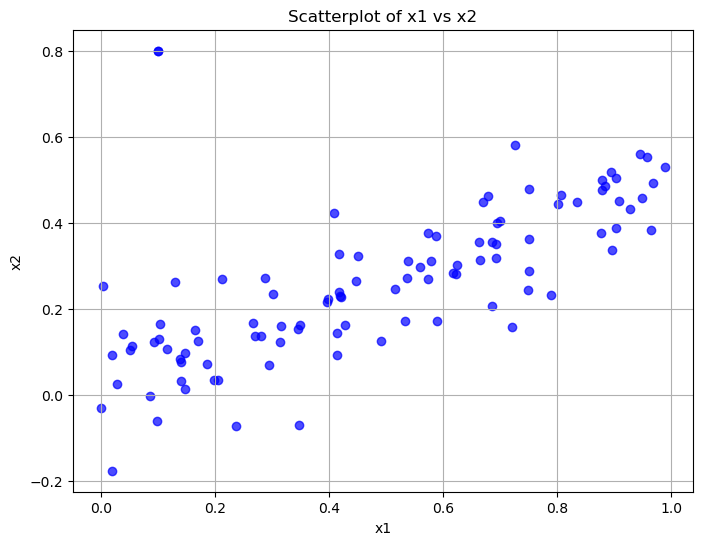

In [121]:
correlation = np.corrcoef(x1, x2)[0, 1]
print("\nCorrelation between x1 and x2:", correlation, "\n")

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c='blue', alpha=0.7)
plt.title("Scatterplot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

The results compared to the true values aren't really that close. 

Thinking only for x2 we can reject the null hypothesis. 

In [111]:
lsr_regression_input = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Fit the regression model
X = lsr_regression_input[['x1', 'x2']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.40e-07
Time:                        19:42:46   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust  

d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

Now it looks like x1 is statistically significant because the p-value is close to 0. 

The F-statistic and its probability also indicate statistically significant. 

In [112]:
# Fit the regression model
X = lsr_regression_input[['x1']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           6.68e-07
Time:                        19:43:02   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust  

e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

Now it looks like x1 is statistically significant because the p-value is close to 0. 

The F-statistic and its probability also indicate statistically significant. 

In [114]:
# Fit the regression model
X = lsr_regression_input[['x2']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.09e-07
Time:                        19:45:57   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust  

f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

Yes they do because in c it indicated that x1 was not stat-sig but in d it does. This is likely due to the collinearity problem.

Interpretation of Coefficients: When collinearity is present, it becomes challenging to interpret the individual coefficients of the correlated variables accurately. This is because the effect of one variable on the dependent variable cannot be separated from the effect of the other correlated variables.

g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.

```
 > x1 <- c(x1, 0.1) 
 > x2 <- c(x2, 0.8) 
 > y <- c(y, 6)
```

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In the model for both x1 and x2 it is an outlier because the output should technically be much lower than 6. 

In the model for just x1 it is also an outlier. 

In the model for x2 it is not an outlier but is a high leverage point. 

In [ ]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [117]:
lsr_regression_input = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Fit the regression model
X = lsr_regression_input[['x1', 'x2']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Fit the regression model
X = lsr_regression_input[['x1']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Fit the regression model
X = lsr_regression_input[['x2']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     23.36
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.88e-09
Time:                        19:50:30   Log-Likelihood:                -145.44
No. Observations:                 102   AIC:                             296.9
Df Residuals:                      99   BIC:                             304.8
Df Model:                           2                                         
Covariance Type:            nonrobust  

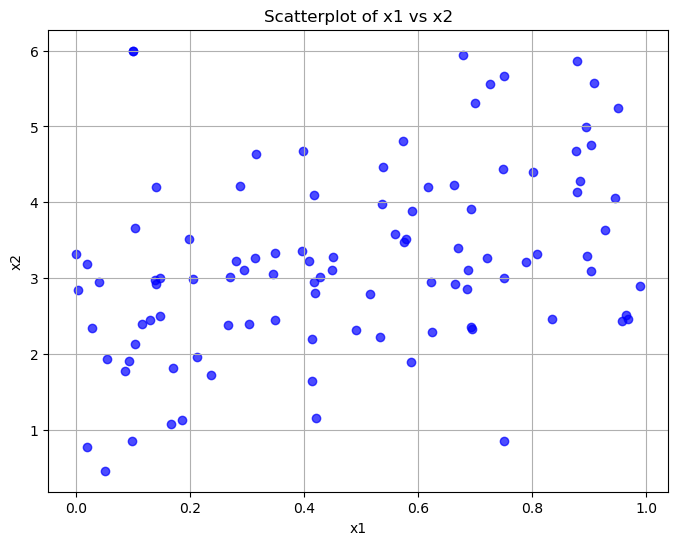

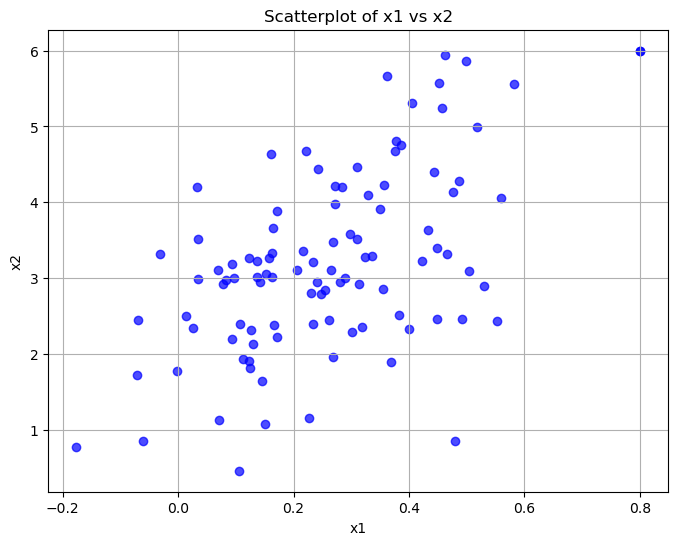

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(x1, y, c='blue', alpha=0.7)
plt.title("Scatterplot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(x2, y, c='blue', alpha=0.7)
plt.title("Scatterplot of x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

# 15) 

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

Based on the results provided, we can determine which predictors are statistically significant based on their p-values. In statistical analysis, a common threshold for statistical significance is a p-value less than 0.05. Predictors with p-values less than 0.05 are generally considered statistically significant, implying that their coefficients are unlikely to be zero by chance. Let's examine the provided results for each predictor:

1. **zn**: The p-value for `zn` is less than 0.05, indicating that it is statistically significant.

2. **indus**: The p-value for `indus` is less than 0.05, indicating that it is statistically significant.

3. **chas**: The p-value for `chas` is greater than 0.05, indicating that it is not statistically significant.

4. **nox**: The p-value for `nox` is less than 0.05, indicating that it is statistically significant.

5. **rm**: The p-value for `rm` is less than 0.05, indicating that it is statistically significant.

6. **age**: The p-value for `age` is less than 0.05, indicating that it is statistically significant.

7. **dis**: The p-value for `dis` is less than 0.05, indicating that it is statistically significant.

8. **rad**: The p-value for `rad` is less than 0.05, indicating that it is statistically significant.

9. **tax**: The p-value for `tax` is less than 0.05, indicating that it is statistically significant.

10. **ptratio**: The p-value for `ptratio` is less than 0.05, indicating that it is statistically significant.

11. **black**: The p-value for `black` is less than 0.05, indicating that it is statistically significant.

12. **lstat**: The p-value for `lstat` is less than 0.05, indicating that it is statistically significant.

13. **medv**: The p-value for `medv` is less than 0.05, indicating that it is statistically significant.

Based on the provided results, the predictors that are statistically significant (based on p-values < 0.05) are: `zn`, `indus`, `nox`, `rm`, `age`, `dis`, `rad`, `tax`, `ptratio`, `black`, `lstat`, and `medv`. The predictor `chas` is not statistically significant as its p-value is greater than 0.05.


In [123]:
# Load the Boston dataset
Boston = pd.read_csv('data/Boston.csv', header=0)

# List of predictors
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Iterate through each predictor and fit a simple linear regression model
for predictor in predictors:
    X = Boston[predictor]
    X = sm.add_constant(X)  # Add a constant term (intercept)
    y = Boston['crim']

    model = sm.OLS(y, X).fit()

    print(f"Predictor: {predictor}")
    print(model.summary())
    print("\n" + "="*80 + "\n")  # Separator between models


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           5.51e-06
Time:                        20:01:45   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:         

b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?


Based on the provided multiple regression results, the statistically significant predictors (with p-values less than 0.05) are:

const (Intercept) - p-value: 0.019
zn - p-value: 0.017
dis - p-value: 0.001
rad - p-value: 0.000
black - p-value: 0.041
medv - p-value: 0.001

In [125]:
# Define predictors (X) and response (y)
X = Boston.drop('crim', axis=1)  # Remove the 'crim' column
y = Boston['crim']

# Add a constant term to the predictor matrix
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.57e-56
Time:                        20:16:36   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust  

c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

The predictors const, zn, dis, rad, black, and medv are statistically significant (p-value < 0.05).
The predictors indus, chas, nox, rm, age, tax, ptratio, and lstat are not statistically significant (p-value > 0.05).

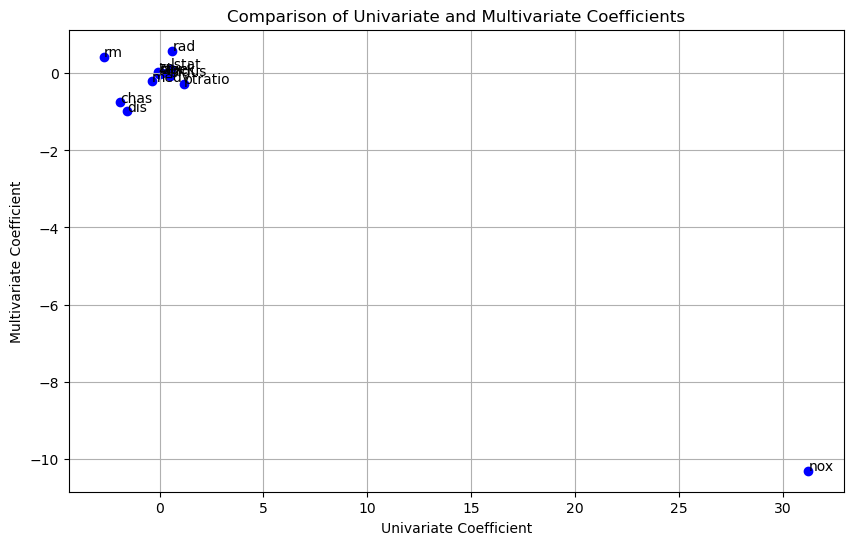

In [132]:
# Coefficients from the univariate regression model for each predictor
coef_univariate = {
    'zn': -0.0739,
    'indus': 0.5098,
    'chas': -1.8928,
    'nox': 31.2485,
    'rm': -2.6841,
    'age': 0.1078,
    'dis': -1.5509,
    'rad': 0.6179,
    'tax': 0.0297,
    'ptratio': 1.1520,
    'black': -0.0363,
    'lstat': 0.5488,
    'medv': -0.3632
}

# Coefficients from the multiple regression model (without 'const')
coef_multiple = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'nox': -10.3135,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Extract predictors from the coefficient dictionaries
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
coef_univariate_values = [coef_univariate[predictor] for predictor in predictors]
coef_multiple_values = [coef_multiple[predictor] for predictor in predictors]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coef_univariate_values, coef_multiple_values, color='blue', marker='o')
plt.title('Comparison of Univariate and Multivariate Coefficients')
plt.xlabel('Univariate Coefficient')
plt.ylabel('Multivariate Coefficient')
plt.grid(True)

# Annotate each point with the predictor name
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (coef_univariate_values[i], coef_multiple_values[i]))

plt.show()


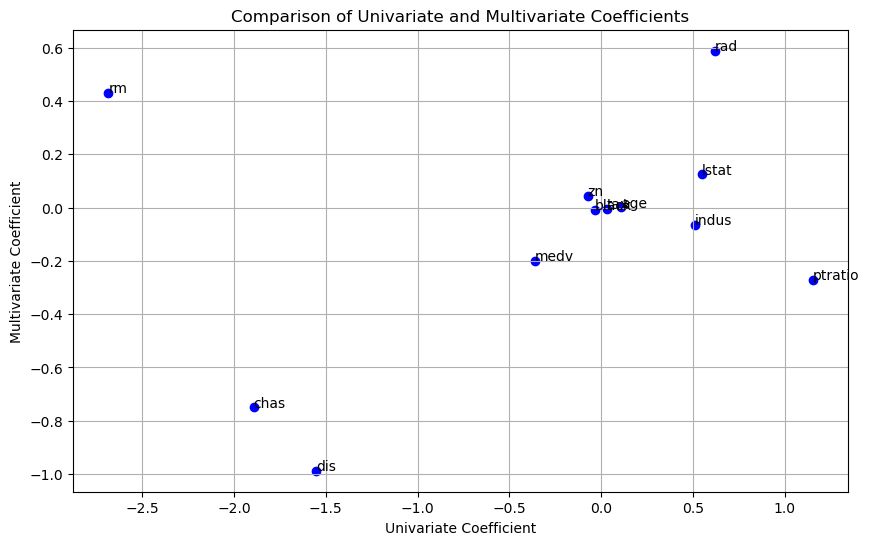

In [133]:
# Removing Nox outlier

# Coefficients from the univariate regression model for each predictor
coef_univariate = {
    'zn': -0.0739,
    'indus': 0.5098,
    'chas': -1.8928,
    'rm': -2.6841,
    'age': 0.1078,
    'dis': -1.5509,
    'rad': 0.6179,
    'tax': 0.0297,
    'ptratio': 1.1520,
    'black': -0.0363,
    'lstat': 0.5488,
    'medv': -0.3632
}

# Coefficients from the multiple regression model (without 'const')
coef_multiple = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Extract predictors from the coefficient dictionaries
predictors = ['zn', 'indus', 'chas', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
coef_univariate_values = [coef_univariate[predictor] for predictor in predictors]
coef_multiple_values = [coef_multiple[predictor] for predictor in predictors]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coef_univariate_values, coef_multiple_values, color='blue', marker='o')
plt.title('Comparison of Univariate and Multivariate Coefficients')
plt.xlabel('Univariate Coefficient')
plt.ylabel('Multivariate Coefficient')
plt.grid(True)

# Annotate each point with the predictor name
for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (coef_univariate_values[i], coef_multiple_values[i]))

plt.show()


d)  Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =β0 +β1X+β2X2 +β3X3 +ε.

## Evidence of Non-Linear Relationships Based on Coefficient P-Values

In regression analysis, the p-values associated with coefficients indicate whether predictor variables have a statistically significant relationship with the target variable. A low p-value (usually < 0.05) suggests a significant effect, while a high p-value suggests insignificance. This can provide evidence of non-linear relationships.

Below is an analysis of p-values for squared and cubed terms of each predictor variable:

1. **Predictor "zn":**
   - p-value for "zn_squared": 0.094 (not significant)
   - p-value for "zn_cubed": 0.230 (not significant)

2. **Predictor "indus":**
   - p-value for "indus_squared": < 0.001 (significant, non-linear)
   - p-value for "indus_cubed": < 0.001 (significant, non-linear)

3. **Predictor "chas":**
   - p-value for "chas_squared": 0.209 (not significant)
   - p-value for "chas_cubed": 0.209 (not significant)

4. **Predictor "nox":**
   - p-value for "nox_squared": < 0.001 (significant, non-linear)
   - p-value for "nox_cubed": < 0.001 (significant, non-linear)

5. **Predictor "rm":**
   - p-value for "rm_squared": 0.364 (not significant)
   - p-value for "rm_cubed": 0.509 (not significant)

6. **Predictor "age":**
   - p-value for "age_squared": 0.047 (significant, non-linear)
   - p-value for "age_cubed": 0.007 (significant, non-linear)

7. **Predictor "dis":**
   - p-value for "dis_squared": < 0.001 (significant, non-linear)
   - p-value for "dis_cubed": < 0.001 (significant, non-linear)

8. **Predictor "rad":**
   - p-value for "rad_squared": 0.613 (not significant)
   - p-value for "rad_cubed": 0.208 (not significant)

9. **Predictor "ptratio":**
   - p-value for "ptratio_squared": < 0.001 (significant, non-linear)
   - p-value for "ptratio_cubed": 0.007 (significant, non-linear)

10. **Predictor "lstat":**
    - p-value for "lstat_squared": < 0.001 (significant, non-linear)
    - p-value for "lstat_cubed": < 0.001 (significant, non-linear)

11. **Predictor "medv":**
    - p-value for "medv_squared": < 0.001 (significant, non-linear)
    - p-value for "medv_cubed": < 0.001 (significant, non-linear)

In summary, based on p-values, predictor variables with statistically significant non-linear relationships with the target variable ("crim") include:
- `indus` (both squared and cubed terms)
- `nox` (both squared and cubed terms)
- `age` (both squared and cubed terms)
- `dis` (both squared and cubed terms)
- `ptratio` (both squared and cubed terms)
- `lstat` (both squared and cubed terms)
- `medv` (both squared and cubed terms)

Note: Interpretation depends on context and dataset.


In [138]:
# Assuming 'data' is your DataFrame containing the dataset
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Loop through each predictor and fit the nonlinear model
for predictor in predictors:
    X = Boston[predictor]
    X_squared = X ** 2
    X_cubed = X ** 3
    Y = Boston['crim']  # Assuming 'crim' is the response variable

    # Create column names for squared and cubed predictors
    predictor_squared = f"{predictor}_squared"
    predictor_cubed = f"{predictor}_cubed"

    # Combine X, X^2, and X^3 into a DataFrame
    X_nonlinear = sm.add_constant(pd.DataFrame({'X': X, predictor_squared: X_squared, predictor_cubed: X_cubed}))

    # Fit the model
    model = sm.OLS(Y, X_nonlinear).fit()

    # Print results
    print(f"Results for predictor: {predictor}")
    print(model.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Results for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.28e-06
Time:                        20:40:04   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Ty